# Solcing Crimes with Data Science

Markus Harrer  
INNOQ Deutschland


## Facts of the case
- a white bus with a red sign on the side window was stolen
- police did an innovative mpbile phone investigation
- there was only phone number of unknown identity: 04638472273

Our approach: Where are the whereabouts / place of residence of the mobile phone owner?

## What do we have?

CDRs (Call Data Records) in an Excel file!

That means: Information about the cell towers used for the phone calls!



## Import and Load
Using pandas to read an Excel file into a Dataframe.

In [18]:
import pandas as pd
cdr = pd.read_excel("cdr_data_export.xlsx")
cdr.head()

,Call,Start,TowerID
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d


Unfortunately: Information about the tower's locations are missing!

We need a second data source from the DARKNET!

## Load another dataset
This time: a CSV file

In [2]:
towers = pd.read_csv("darknet.io/hacks/infrastructure/mobile_net/texas_towers.csv", index_col=0)
towers.head()

,TowerLat,TowerLon
TowerID,,
0db53dd3,32.731611,-96.709417
aeaf8b43,32.731722,-96.709500
fadaa83f,32.899944,-96.910389
95d7920d,32.899944,-96.910389
95c91e8b,32.899944,-96.910389


# Join
Bringing datasets together

In [3]:
call_data = cdr.join(towers, on='TowerID')
call_data.head()

,Call,Start,TowerID,TowerLat,TowerLon
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389


In [4]:
call_data[['Caller', 'Symbol', 'Callee']] = call_data['Call'].str.split("(->|-X)", expand=True)
call_data.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273


In [5]:
call_data['Event'] = call_data['Symbol'].map(
{
    "->" : "Incoming",
    "-X" : "Missed"
})
call_data.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming


# Filtering

In [6]:
suspect_data = call_data[(call_data['Callee'] == '04638472273') | (call_data['Caller'] == '04638472273')].copy()
suspect_data.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming


In [7]:
suspect_data['Start'] = pd.to_datetime(suspect_data['Start'])
suspect_data.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming


In [8]:
suspect_data['DoW'] = suspect_data['Start'].dt.weekday_name
suspect_data.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event,DoW
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming,Saturday
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming,Saturday
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming,Saturday
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming,Saturday
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming,Saturday


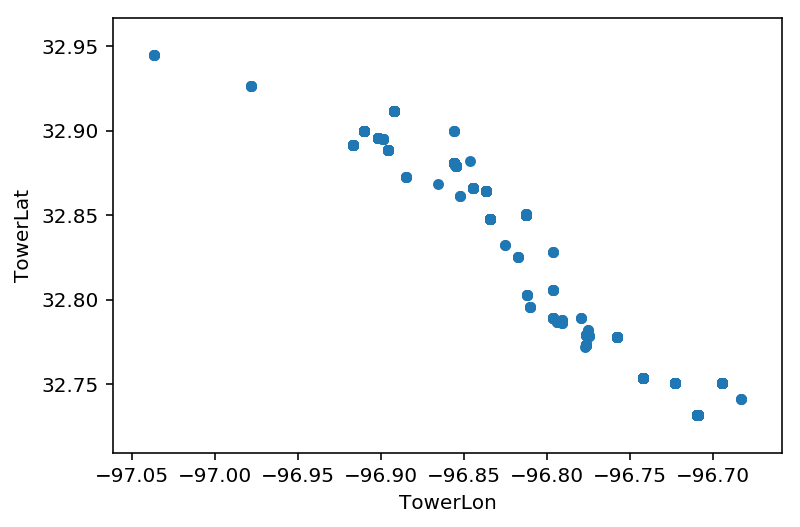

In [9]:
suspect_data.plot.scatter('TowerLon', "TowerLat");

In [10]:
suspect_on_weekend = suspect_data[suspect_data['DoW'].isin(['Saturday', 'Sunday'])].copy()
suspect_on_weekend.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event,DoW
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming,Saturday
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming,Saturday
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming,Saturday
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming,Saturday
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming,Saturday


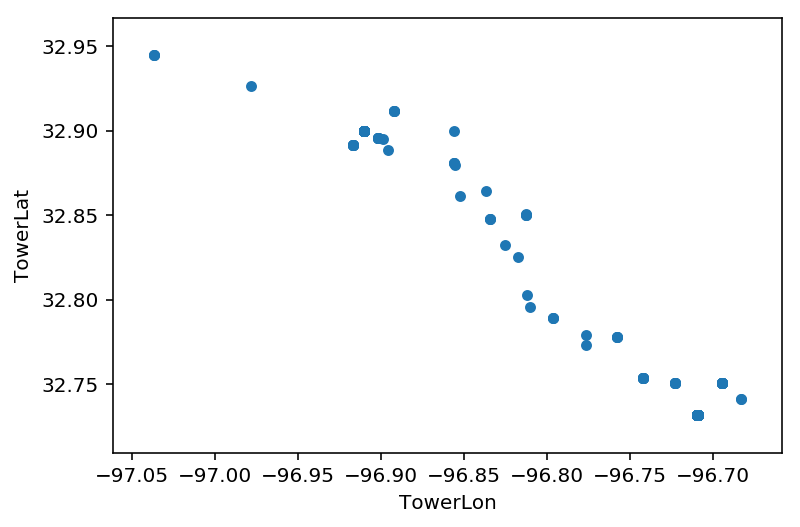

In [11]:
suspect_on_weekend.plot.scatter('TowerLon', "TowerLat");

In [12]:
suspect_on_weekend['Start']
suspect_on_weekend['hour'] = suspect_on_weekend['Start'].dt.hour
suspect_on_weekend.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event,DoW,hour
0,02666307251->04638472273,2010-12-25 07:16:24.736813,0db53dd3,32.731611,-96.709417,02666307251,->,04638472273,Incoming,Saturday,7
1,01755442610->04638472273,2010-12-25 21:18:30.053710,aeaf8b43,32.731722,-96.709500,01755442610,->,04638472273,Incoming,Saturday,21
2,05481755331->04638472273,2010-12-25 14:52:42.878016,fadaa83f,32.899944,-96.910389,05481755331,->,04638472273,Incoming,Saturday,14
3,01755442610->04638472273,2010-12-25 16:02:09.001913,fadaa83f,32.899944,-96.910389,01755442610,->,04638472273,Incoming,Saturday,16
4,02145623768->04638472273,2010-12-25 15:28:35.028554,95d7920d,32.899944,-96.910389,02145623768,->,04638472273,Incoming,Saturday,15


In [13]:
suspect_on_weekend_night = suspect_on_weekend[
    (suspect_on_weekend['hour'] < 6)  | (suspect_on_weekend['hour'] > 22)]
suspect_on_weekend_night.head()

,Call,Start,TowerID,TowerLat,TowerLon,Caller,Symbol,Callee,Event,DoW,hour
7468,07756914135->04638472273,2011-04-17 05:15:40.205917,cd9f3b1a,32.731722,-96.709500,07756914135,->,04638472273,Incoming,Sunday,5
9753,07922223441->04638472273,2011-05-21 05:08:20.121145,0db53dd3,32.731611,-96.709417,07922223441,->,04638472273,Incoming,Saturday,5
17515,02666307251->04638472273,2011-09-11 05:44:15.432523,bcec0121,32.731611,-96.709417,02666307251,->,04638472273,Incoming,Sunday,5
31973,01755442610->04638472273,2012-04-14 05:42:32.004437,d760c426,32.731611,-96.709417,01755442610,->,04638472273,Incoming,Saturday,5
32604,07922223441->04638472273,2012-04-22 05:02:55.678110,8ba7e0d7,32.731611,-96.709417,07922223441,->,04638472273,Incoming,Sunday,5


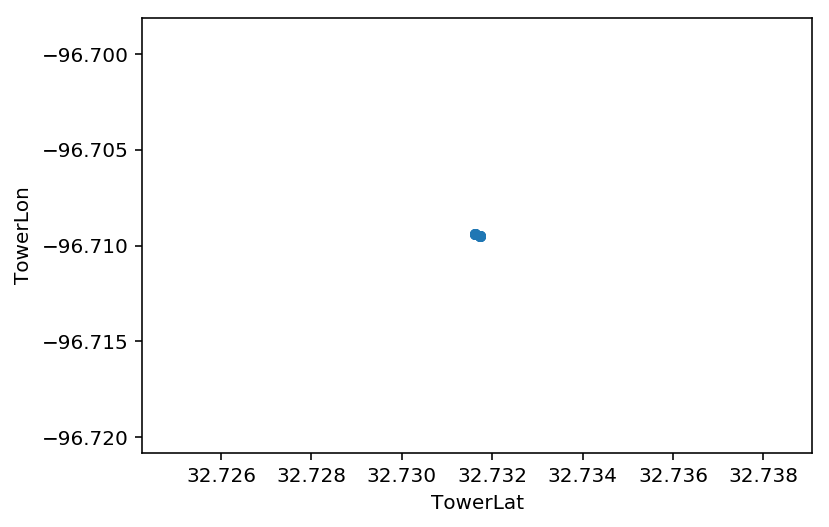

In [14]:
ax = suspect_on_weekend_night.plot.scatter('TowerLat', 'TowerLon')

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 1)
data = suspect_on_weekend_night[['TowerLat', 'TowerLon']]
kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

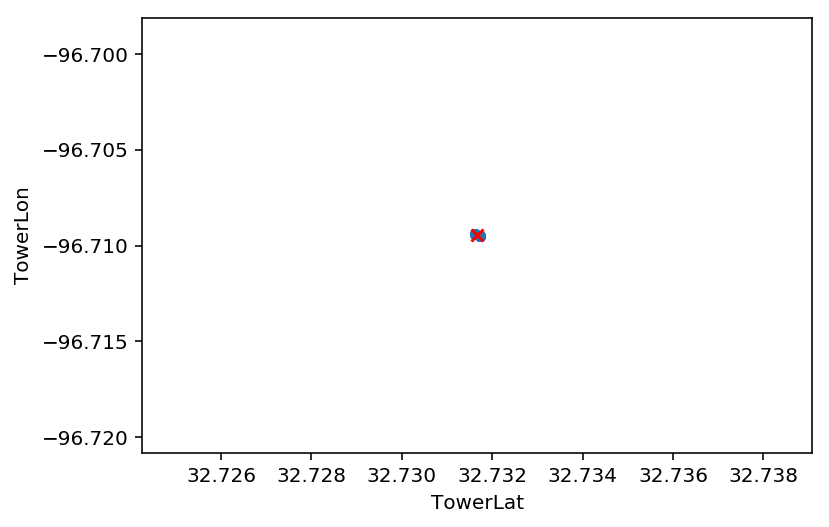

In [16]:
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x')
ax.figure

In [17]:
centroids

array([[ 32.73167155, -96.70946227]])